In [ ]:
%gui qt*

In [1]:
config_file = "../grid_code/agrid.py"
with open(config_file) as f:
    code = compile(f.read(), config_file, 'exec')
    exec(code, globals(), locals())

# ... or use you Python path or present working directory:
#from agrid import *

/Users/tobiasstal/anaconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/tobiasstal/anaconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#Continental
ant = Grid(crs=3031, res = [10*km, 10*km], left = -3100*km, up=3100*km, right = 3100*km, down = -3100*km)

ant.ds['ICE'] = (('Y', 'X'), 
                ant.read_raster('../data/bedmap2_tiff/bedmap2_thickness.tif'))

no_data = 32767.
ant.ds['ICE'] = ant.ds['ICE'].where(ant.ds['ICE'] != no_data)  

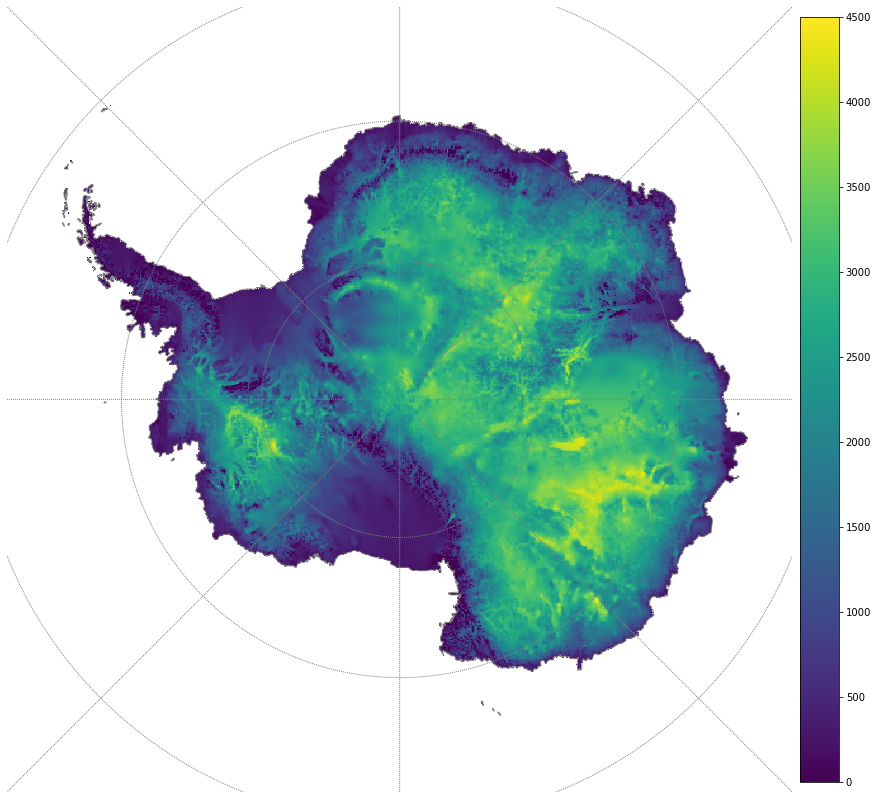

In [3]:
ant.map_grid('ICE', vmin=0, vmax=4500, cmap='viridis', cbar=True)

In [ ]:
dranage, int_map = ant.assign_shape('../data/GSFC_DrainageSystems.shp', 
                                                 'ID', map_to_int = True, return_map = True)
ant.ds['DRANAGE'] = (('Y', 'X'), dranage)

In [ ]:
ant.map_grid(ant.ds['DRANAGE'], cmap='viridis', cbar=True)

In [ ]:
polygons = [int_map[str(x) + 'g'] for x in range(2,18)]

In [ ]:
ant.ds['EAST_ICE'] = ant.ds['ICE']*ant.ds['DRANAGE'].isin(polygons)
ant.map_grid('EAST_ICE', cmap='viridis')

In [ ]:
print(int(ant.ds['EAST_ICE'].sum()*np.prod(ant.res)/km**3),'km3')

In [ ]:
import scipy

# prepare some interesting function:
def f(x, y):
    return 3.0*scipy.sin(x*y+1e-4)/(x*y+1e-4)

x = scipy.arange(-7., 7.05, 0.1)
y = scipy.arange(-5., 5.05, 0.1)

# 3D visualization of f:
from tvtk.tools import mlab
fig = mlab.figure()
s = mlab.SurfRegular(x, y, f)
fig.add(s)

In [ ]:
test_volume_slice()

In [ ]:
# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>
# Copyright (c) 2008, Enthought, Inc.
# License: BSD Style.

# Retrieve the grand Canyon topological data ##################################
import os
# Original file:
#'ftp://e0srp01u.ecs.nasa.gov/srtm/version2/SRTM1/Region_04/N36W113.hgt.zip'
if not os.path.exists('N36W113.hgt.zip'):
    # Download the data
    try:
        from urllib import urlopen
    except ImportError:
        from urllib.request import urlopen
    print('Downloading data, please wait (10M)')
    opener = urlopen(
    'https://s3.amazonaws.com/storage.enthought.com/www/sample_data/N36W113.hgt.zip'
        )
    open('N36W113.hgt.zip', 'wb').write(opener.read())

# Load the data (signed 2 byte integers, big endian) ##########################
import zipfile
import numpy as np

data = np.fromstring(zipfile.ZipFile('N36W113.hgt.zip').read('N36W113.hgt'),
                    '>i2')
data.shape = (3601, 3601)
data = data.astype(np.float32)

# Plot an interesting section #################################################
from mayavi import mlab
data = data[:1000, 900:1900]
# Convert missing values into something more sensible.
data[data == -32768] = data[data > 0].min()

mlab.figure(size=(400, 320), bgcolor=(0.16, 0.28, 0.46))
mlab.surf(data, colormap='gist_earth', warp_scale=0.2,
            vmin=1200, vmax=1610)
# The data takes a lot of memory, and the surf command has created a
# copy. We free the inital memory.
del data

# A view of the canyon
mlab.view(-5.9, 83, 570, [5.3, 20, 238])
mlab.show()

In [ ]:
from mayavi import mlab

ant.ds['BED'] = (('Y', 'X'), 
                ant.read_raster('../data/bedmap2_tiff/bedmap2_bed.tif'))

ant.ds['BED'] = ant.ds['BED'].where(ant.ds['BED'] != no_data)  

data = ant.ds['BED'].values

s = mlab.figure(size=(900, 900), bgcolor=(1, 1, 1))
mlab.options.offscreen = True
mlab.surf(data, colormap='terrain', warp_scale=0.01,
            vmin=-4000, vmax=4000)


#mlab.options.show_axes = True
#mlab.options.light_manager.light_mode = 'vtk'

# A view of the canyon
#mlab.view(45, 10000, 5000, [0, 0, 0])
mlab.view(azimuth=0, elevation=7500, distance=1200, roll=90)
mlab.savefig('para33m10.png', figure = s)
mlab.close()


! open para33m10.png

In [5]:
from mayavi import mlab
import numpy as np

#ant.ds['BED'] = (('Y', 'X'), 
#                ant.read_raster('../data/bedmap2_tiff/bedmap2_bed.tif'))

#ant.ds['BED'] = ant.ds['BED'].where(ant.ds['BED'] != no_data)  

#data = ant.ds['BED'].values

data = np.random.rand(1000, 1000)*8000-4000


mlab.figure(size=(700,830))
mlab.options.offscreen = True
mlab.surf(data)


#scene = engine.scenes[0]
#s.scene.show_axes = True
#s.scene.light_manager.light_mode = 'vtk'

# A view of the canyon
#mlab.view(45, 10000, 5000, [0, 0, 0])
mlab.view(azimuth=0, elevation=75, distance=2.4, roll=-50)
mlab.savefig("../jabba.jpg")
mlab.close()

! open ../jabba.jpg

In [8]:
L = ['g12', '2,1', '2', 'f']
print(L)
print(L.sort())

['g12', '2,1', '2', 'f']
None


In [ ]:
from numpy import linspace, meshgrid, array, sin, cos, pi, abs
from scipy.special import sph_harm 
from mayavi import mlab

theta_1d = linspace(0,   pi,  91) 
phi_1d   = linspace(0, 2*pi, 181)

theta_2d, phi_2d = meshgrid(theta_1d, phi_1d)
xyz_2d = array([sin(theta_2d) * sin(phi_2d),
                sin(theta_2d) * cos(phi_2d),
                cos(theta_2d)]) 
l=3
m=0

Y_lm = sph_harm(m,l, phi_2d, theta_2d)
r = abs(Y_lm.real)*xyz_2d
    
mlab.figure(size=(700,830))
mlab.mesh(r[0], r[1], r[2], scalars=Y_lm.real, colormap="cool")
mlab.view(azimuth=0, elevation=75, distance=2.4, roll=-50)
mlab.savefig("Y_%i_%i.jpg" % (l,m))
mlab.show()

In [ ]:
from mayavi import mlab